# Quickstart
* [tutorial](http://lightkurve.keplerscience.org/tutorials/1.02-target-pixel-files.html)

In [2]:
import getpass
uname = getpass.getuser()

if uname == 'prometheus' or uname == 'jp':
    data_dir = '/home/'+uname+'/data/transit/c16-tpf'
elif uname == 'muscat':
    data_dir = '../c16-tpf'
else: 
    data_dir = '.'

Selected sample from entire C16 targets with Kp mag = [10,12].

In [3]:
import pandas as pd
import numpy as np

fname = '../data/K2Campaign16targets_edited.csv'

df=pd.read_csv(fname, index_col=0)#, dtype={' magnitude': float})

In [4]:
mag1012 = df.query('magnitude > 10 and magnitude < 12').sort_values(by='magnitude', ascending=True)

In [5]:
mag1012.head()

,EPIC ID,RA (J2000) [deg],Dec (J2000) [deg],magnitude,Investigation IDs
17217,211814879,133.287804,17.526790,10.001,GO16052_LC
12247,211629981,137.741823,14.956537,10.001,GO16052_LC
16681,211794319,136.919732,17.236207,10.005,GO16009_LC|GO16021_LC|GO16028_LC
17351,211818898,132.626847,17.584589,10.006,GO16052_LC
33359,251360161,137.580823,21.929321,10.006,GO16052_LC


To install the forked version of lightkurve with a simple patch:

In [6]:
import matplotlib.pyplot as pl
%matplotlib inline

import os
from glob import glob
import numpy as np
from astropy.io import fits
import pandas as pd

In [7]:
file_list = glob(data_dir+'/mag10-12/*.fits')
file_list.sort()
len(file_list)

60

Test

In [8]:
from lightkurve import KeplerTargetPixelFile

i = file_list[-1]
tpf = KeplerTargetPixelFile(i, quality_bitmask='hardest')

In [9]:
np.sum(tpf.pipeline_mask)

0

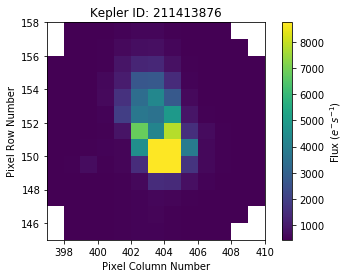

In [10]:
ax = tpf.plot(aperture_mask=tpf.pipeline_mask, mask_color='b', frame=300,
              scale='linear', cmap='viridis', show_colorbar=True)

Pipeline mask is none, so 'all' pixels are used in generating lightcurve.

In [11]:
lc = tpf.to_lightcurve(aperture_mask='all');
lc = lc.remove_nans().remove_outliers(sigma=3)
flat_lc, trend = lc.flatten(window_length=301, return_trend=True)

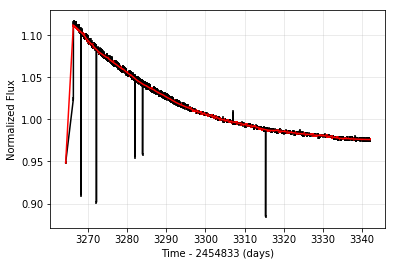

In [12]:
ax = lc.plot()                         
trend.plot(ax, color='red');

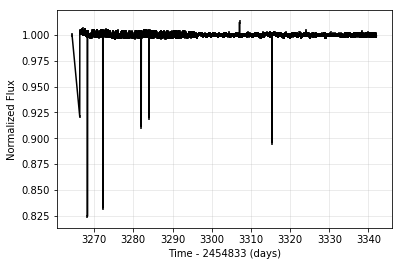

In [13]:
flat_lc.plot();

## Using van Eylen `find_aperture`

In [14]:
import sys
sys.path.append('../K2tools')
from utils import *

In [15]:
times = tpf.time
fluxes = tpf.flux
irregular_mask = make_mask(fluxes,cutoff_limit=1.0,shape='irregular')

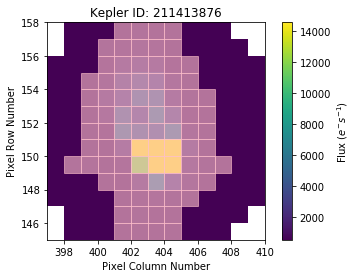

In [17]:
tpf.plot(aperture_mask=irregular_mask)

Other masks

In [18]:
round_mask  = make_mask(fluxes,rad=5,shape='round')
square_mask = make_mask(fluxes,rad=5,shape='square')

In [19]:
round_mask.shape

(13, 13)

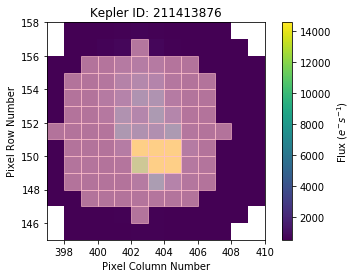

In [20]:
tpf.plot(aperture_mask=round_mask)

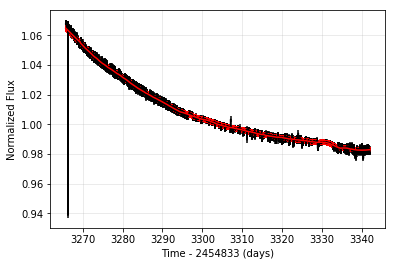

In [21]:
lc = tpf.to_lightcurve(aperture_mask=round_mask);
lc = lc.remove_nans().remove_outliers(sigma=3)
flat_lc, trend = lc.flatten(window_length=301, return_trend=True)

ax = lc.plot()                         
trend.plot(ax, color='red');

In [19]:
tpf.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 140.2557671706148  17.13191438725346  
CRPIX : 1083.384  1112.5  
PC1_1 PC1_2  : 0.9027238464796911  0.426404562323318  
PC2_1 PC2_2  : -0.4284043898011665  0.9054002692592359  
CDELT : -0.001102672560321  0.001102672560321  
NAXIS : 0  0

In [20]:
lc2 = tpf.to_lightcurve(aperture_mask=aperture);
lc2 = lc2.remove_nans().remove_outliers(sigma=3.5)

In [21]:
lc2 = lc2.remove_nans().remove_outliers(sigma=3)
flat_lc2, trend = lc2.flatten(window_length=301, return_trend=True)

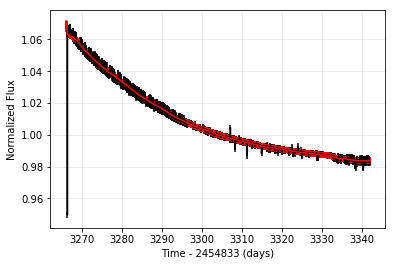

In [22]:
ax = lc2.plot()                         
trend.plot(ax, color='red');

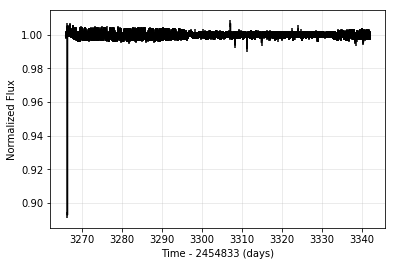

In [23]:
flat_lc2.plot();

## sff function

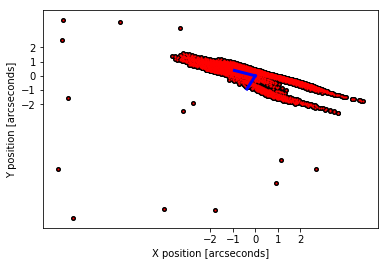

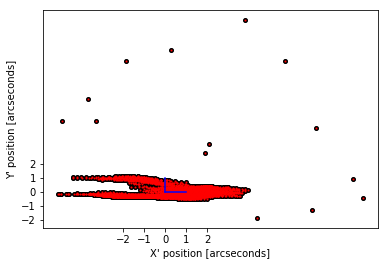

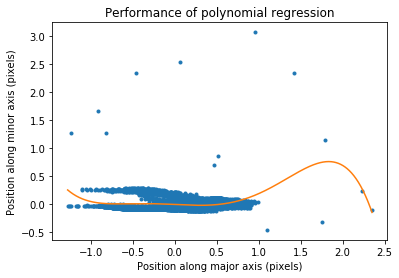

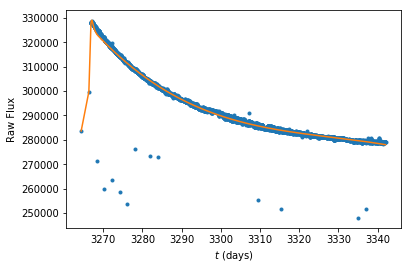

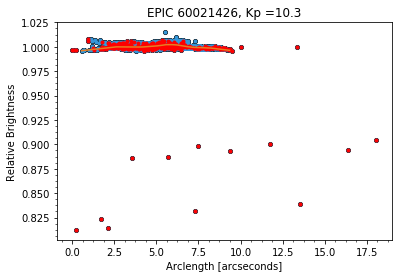

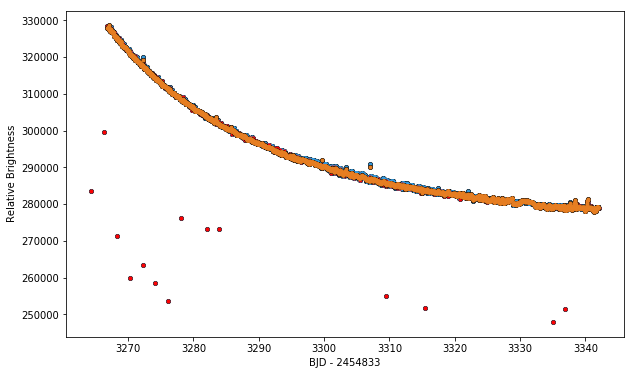

In [21]:
import sys
sys.path.append('../corrector/')
from sff import apply_sff

corr_fluxes, trend = apply_sff(lc.time, lc.flux, lc.centroid_col, lc.centroid_row, showfig=True, return_trend=True)

## sff manual

In [22]:
corr_lc = lc2.correct(windows=30)

100%|██████████| 30/30 [00:01<00:00, 15.95it/s]


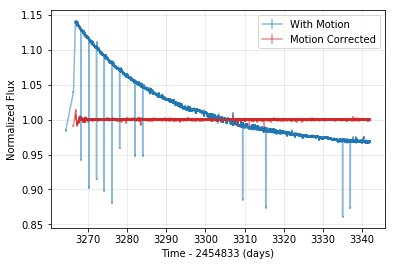

In [23]:
ax = lc.plot(color='C0', alpha=0.5, label='With Motion')

corr_lc = corr_lc.remove_outliers(sigma=20.0)
ax = corr_lc.plot(ax=ax, color='C3', alpha=0.5, label='Motion Corrected');

In [24]:
#before, after
lc.cdpp(), corr_lc.cdpp()

(1333.5793025894327, 190.0453808638243)

In [24]:
type(fits.open('../data/hlsp_k2sff_k2_lightcurve_060021426-cet_kepler_v1_llc.fits'))

astropy.io.fits.hdu.hdulist.HDUList

In [25]:
fits.open('../data/hlsp_k2sff_k2_lightcurve_060021426-cet_kepler_v1_llc.fits').info()

Filename: ../data/hlsp_k2sff_k2_lightcurve_060021426-cet_kepler_v1_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   ()      
  1  BESTAPER      1 BinTableHDU    240   312R x 6C   [D, D, D, D, I, J]   
  2  CIRC_APER0    1 BinTableHDU    240   312R x 6C   [D, D, D, D, I, J]   
  3  CIRC_APER1    1 BinTableHDU    240   312R x 6C   [D, D, D, D, I, J]   
  4  CIRC_APER2    1 BinTableHDU    240   312R x 6C   [D, D, D, D, I, J]   
  5  CIRC_APER3    1 BinTableHDU    240   312R x 6C   [D, D, D, D, I, J]   
  6  CIRC_APER4    1 BinTableHDU    240   312R x 6C   [D, D, D, D, I, J]   
  7  CIRC_APER5    1 BinTableHDU    240   312R x 6C   [D, D, D, D, I, J]   
  8  CIRC_APER6    1 BinTableHDU    240   312R x 6C   [D, D, D, D, I, J]   
  9  CIRC_APER7    1 BinTableHDU    240   312R x 6C   [D, D, D, D, I, J]   
 10  CIRC_APER8    1 BinTableHDU    240   312R x 6C   [D, D, D, D, I, J]   
 11  CIRC_APER9    1 BinTableHDU    240   312R x 6C

In [25]:
final_lc=pd.DataFrame(np.c_[corr_lc.time, corr_lc.flux, corr_lc.flux_err])
final_lc.columns = ['time','flux','flux_err']
final_lc.head()

,time,flux,flux_err
0,3266.328991,0.990722,0.001880
1,3266.860313,1.013596,0.002003
2,3266.880749,1.011125,0.002003
3,3266.901184,1.007964,0.002003
4,3266.921620,1.005836,0.002003


In [26]:
from astropy import table

tab = table.Table(final_lc.values,
                  names=['time','flux','flux_err'])
tab

time,flux,flux_err
float64,float64,float64
3266.3289909511805,0.9907217881573875,0.0018801950734225249
3266.8603134332225,1.013595955728997,0.002003351929134911
3266.880749013275,1.0111253453265883,0.002003176051551548
3266.9011843935587,1.0079639757275296,0.0020030452241124362
3266.9216198744252,1.00583619163404,0.0020028773099384106
3266.9420554558747,1.005152343007693,0.002002991300454924
3266.9624908370897,1.003398498363478,0.002002822021125012
3266.9829263188876,1.0012398908182811,0.0020030540976256977
3267.0033619008027,1.00158611105209,0.0020032299752090602


In [27]:
from astropy.io import fits

i = file_list[-1]
hdr = fits.getheader(i)
hdulist = fits.open(i)

num = 1
comment_num = 'COMMENT{}'.format(num)

#llc-default-aper
aper = 'default'
hdr[comment_num] = 'aper rad: {}'.format(aper)
bintab=fits.BinTableHDU(tab,name='BESTAPER',header=hdr)
#append to original
hdulist.append(bintab)

In [28]:
hdu=fits.hdu.ImageHDU(np.array(aperture,dtype=float), name='APERTURE', header=hdr) #problem with bool

#hdulist.append(hdu)
#replace aperture
hdulist[2] = hdu

In [29]:
hdulist.info()

Filename: /home/jp/data/transit/c16-tpf/ktwo211400082-unofficial-tpf.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      55   ()      
  1  TARGETTABLES    1 BinTableHDU    284   3888R x 12C   [D, E, J, 156J, 156E, 156E, 156E, 156E, 156E, J, E, E]   
  2  APERTURE      1 ImageHDU        59   (13, 12)   float64   
  3  BESTAPER      1 BinTableHDU     68   3626R x 3C   ['D', 'D', 'D']   


In [30]:
fname_new = i.split('/')[-1].split('-')[0][4:]+'_test.fits'
hdulist.writeto(fname_new)

## Period search

In [23]:
from gatspy.periodic import LombScargleFast

model=LombScargleFast(fit_period=True)

model.optimizer.period_range = (1, 10)

model.fit(flat_lc.time, flat_lc.flux, flat_lc.flux_err)

Finding optimal frequency:
 - Estimated peak width = 0.085
 - Using 5 steps per peak; omega_step = 0.017
 - User-specified period range:  1 to 10
 - Computing periods at 334 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps


In [24]:
p=model.best_period
p

1.9611773359127873

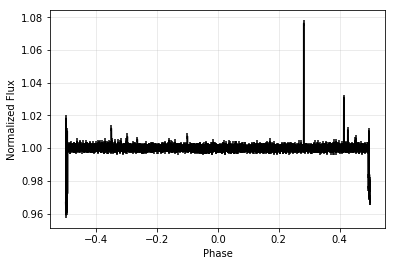

In [25]:
folded_lc = flat_lc.fold(period=p)
folded_lc.plot();

# Vdb data

# C16 data

100%|██████████| 11/11 [00:01<00:00,  9.39it/s]


cdpp = 0.0020


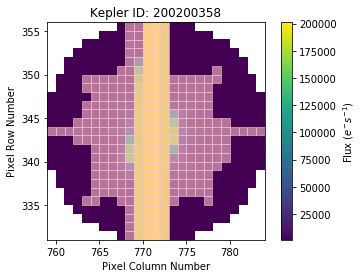

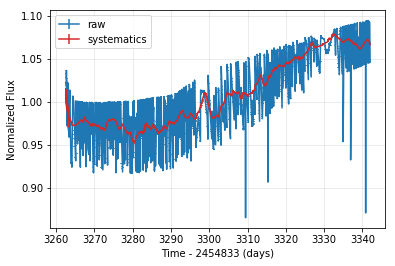

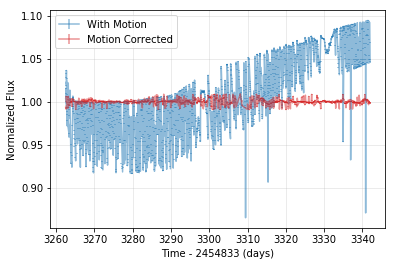

In [31]:
from lightkurve import KeplerTargetPixelFile

sigma = 3
flat_window = 301
corr_window = 11
cutoff_limit = 1.1
polyorder=4
break_tolerance=5

i = file_list[2]
#read tpf
tpf = KeplerTargetPixelFile(i, quality_bitmask='hardest')

times, fluxes = tpf.time, tpf.flux
#confirm aperture
aperture = find_aperture(times,fluxes,cutoff_limit=cutoff_limit,starname=tpf.keplerid)
tpf.plot(aperture_mask=aperture)
#convert to lightcurve
lc = tpf.to_lightcurve(aperture_mask=aperture)
#clean 
lc = lc.remove_nans().remove_outliers(sigma=sigma)
#correcting for low freq variability
flat_lc, trend = lc.flatten(window_length=flat_window,
                            polyorder=polyorder,
                            break_tolerance=break_tolerance, 
                            return_trend=True)
ax = lc.plot(color='C0', label='raw')                         
trend.plot(ax=ax, color='C3',label='systematics');
#correct for systematics using sff
corr_lc = lc.correct(windows=corr_window, method='sff')
corr_lc = corr_lc.remove_outliers(sigma)
#comparison
ax2 = lc.plot(color='C0', alpha=0.5, label='With Motion')
corr_lc.plot(ax=ax2, color='C3', alpha=0.5, label='Motion Corrected');

cdpp = noise_statistic(corr_lc.time, corr_lc.flux, verbose=True)

In [32]:
len(file_list)

21

100%|██████████| 51/51 [00:03<00:00, 14.32it/s]


cdpp = 0.0035


100%|██████████| 51/51 [00:02<00:00, 19.53it/s]


cdpp = 0.0008


100%|██████████| 51/51 [00:02<00:00, 17.66it/s]


cdpp = 0.0022


100%|██████████| 51/51 [00:02<00:00, 19.39it/s]


cdpp = 0.0023


 53%|█████▎    | 27/51 [00:01<00:01, 19.01it/s]/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:595: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:598: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/astropy/stats/sigma_clipping.py:155: RuntimeWarning: invalid value encountered in greater
  _filtered_data.mask |= _filtered_data > max_value
/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/astropy/stats/sigma_clipping.py:156: RuntimeWarning: invalid value encountered in less
  _filtered_data.mask |= _filtered_data < min_value



/home/jp/data/transit/c16-tpf/ktwo200200360-unofficial-tpf.fits


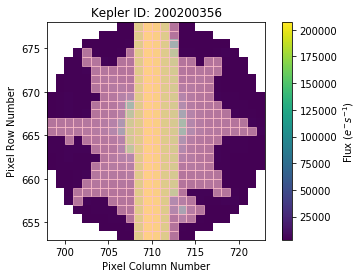

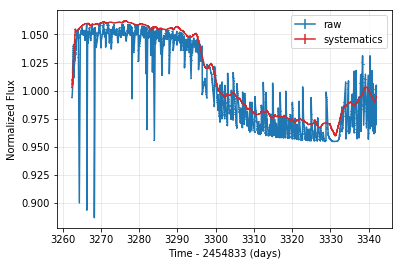

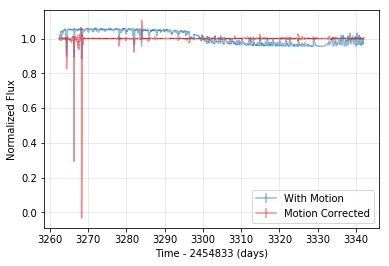

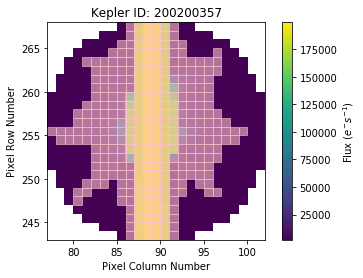

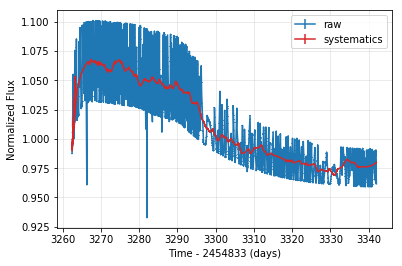

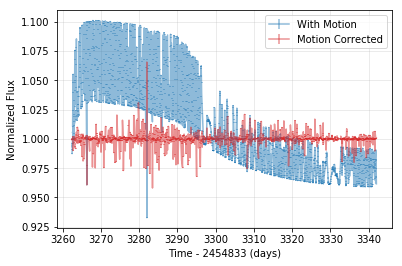

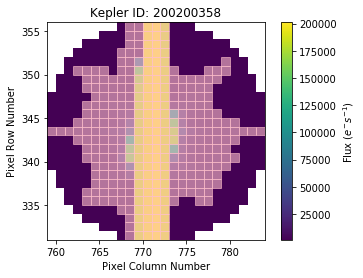

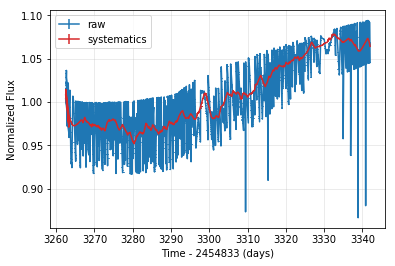

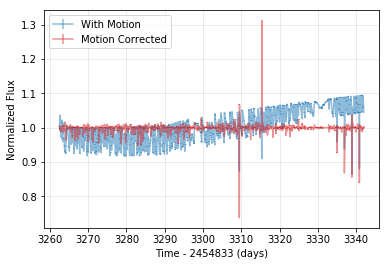

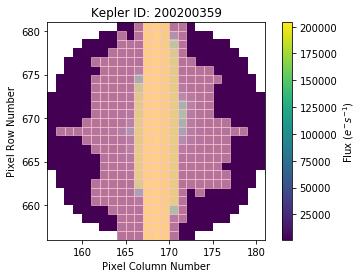

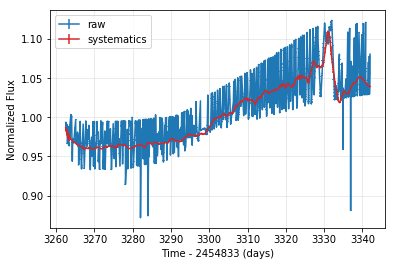

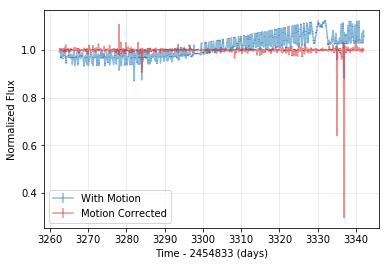

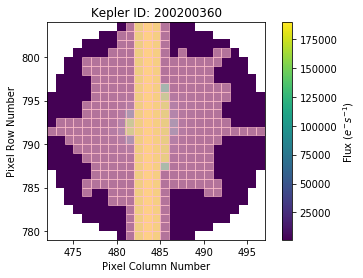

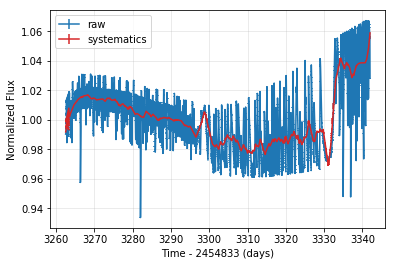

In [33]:
sigma = 3
flat_window = 301
corr_window = 51
cutoff_limit = 1.0
polyorder=4
break_tolerance=5

for i in file_list[:5]:
    try:
        #read tpf
        tpf = KeplerTargetPixelFile(i, quality_bitmask='hardest')
        #confirm aperture
        times, fluxes = tpf.time, tpf.flux
        aperture = find_aperture(times,fluxes,starname=tpf.keplerid)
        tpf.plot(aperture_mask=aperture)
        #convert to lightcurve
        lc = tpf.to_lightcurve(aperture_mask=aperture)
        #clean 
        lc = lc.remove_nans().remove_outliers(sigma=sigma)
        #correcting for low freq variability
        flat_lc, trend = lc.flatten(window_length=flat_window,
                            polyorder=polyorder,
                            break_tolerance=break_tolerance, 
                            return_trend=True)
        ax = lc.plot(color='C0', label='raw')                         
        trend.plot(ax=ax, color='C3',label='systematics');
        #correct for systematics using sff
        corr_lc = lc.correct(windows=corr_window, method='sff')
        
        #corr_lc = corr_lc.remove_outliers(sigma=10)
        #comparison
        ax2 = lc.plot(color='C0', alpha=0.5, label='With Motion')
        corr_lc.plot(ax=ax2, color='C3', alpha=0.5, label='Motion Corrected');
        
        cdpp = noise_statistic(corr_lc.time, corr_lc.flux,verbose=True)
    except:
        print(i)

100%|██████████| 51/51 [00:02<00:00, 20.23it/s]


cdpp = 0.0014


100%|██████████| 51/51 [00:02<00:00, 18.93it/s]


cdpp = 0.0093


100%|██████████| 51/51 [00:02<00:00, 20.29it/s]


cdpp = 0.0711


100%|██████████| 51/51 [00:02<00:00, 21.07it/s]


cdpp = 0.0075


100%|██████████| 51/51 [00:02<00:00, 19.69it/s]


cdpp = 0.0013


100%|██████████| 51/51 [00:02<00:00, 20.27it/s]


cdpp = 0.0002


100%|██████████| 51/51 [00:02<00:00, 19.87it/s]
/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


cdpp = 0.0004


/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
100%|██████████| 51/51 [00:02<00:00, 20.89it/s]
/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


cdpp = 0.0006


/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
100%|██████████| 51/51 [00:02<00:00, 20.11it/s]
/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


cdpp = 0.0001


/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
100%|██████████| 51/51 [00:02<00:00, 19.48it/s]
/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


cdpp = 0.0006


/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
100%|██████████| 51/51 [00:02<00:00, 19.28it/s]
/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


cdpp = 0.0002


/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
100%|██████████| 51/51 [00:02<00:00, 19.03it/s]
/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


cdpp = 0.0001


/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
100%|██████████| 51/51 [00:02<00:00, 20.71it/s]
/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


cdpp = 0.0001


/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
100%|██████████| 51/51 [00:02<00:00, 20.24it/s]
/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


cdpp = 0.0006


/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
100%|██████████| 51/51 [00:02<00:00, 19.48it/s]
/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


cdpp = 0.0005


/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
100%|██████████| 51/51 [00:02<00:00, 20.33it/s]
/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


cdpp = 0.0013


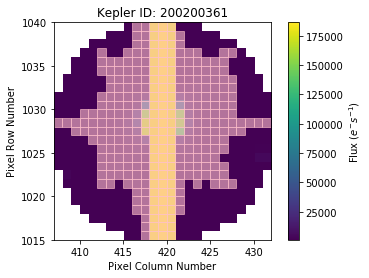

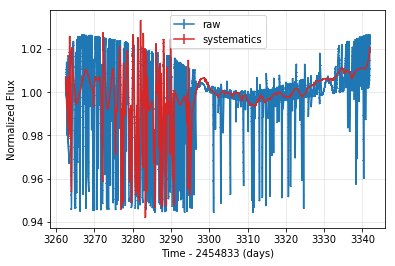

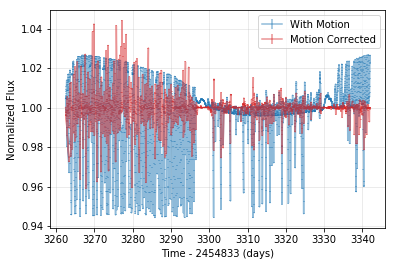

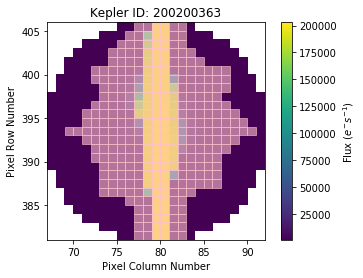

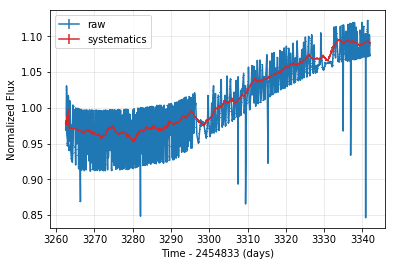

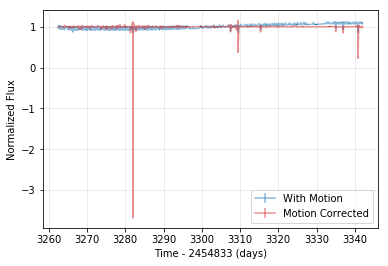

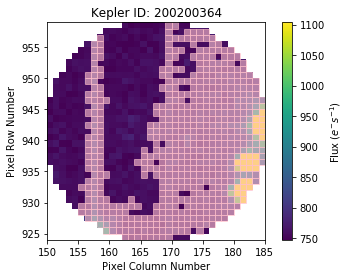

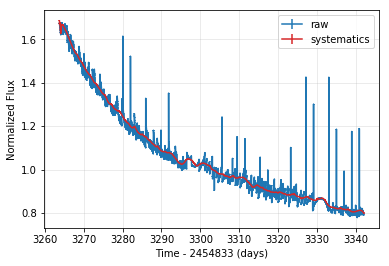

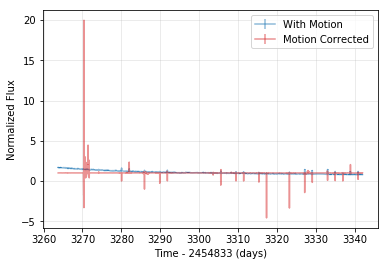

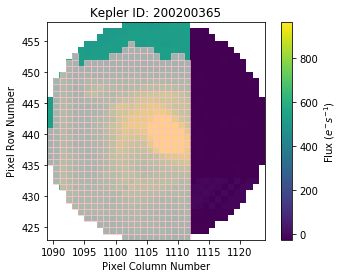

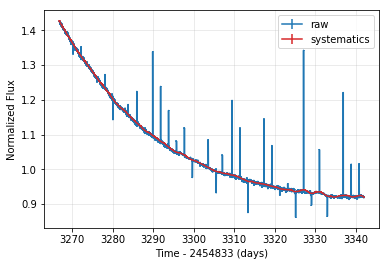

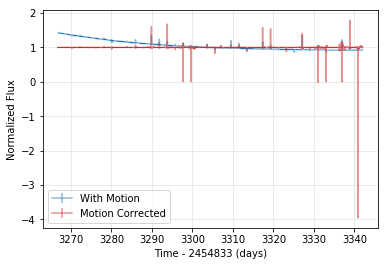

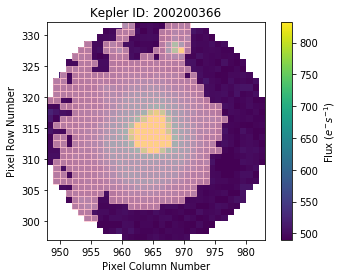

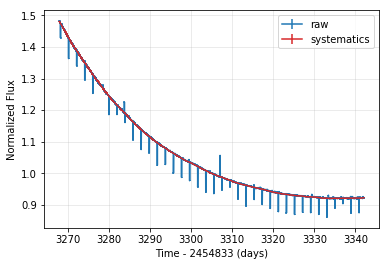

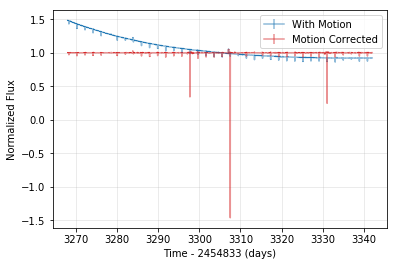

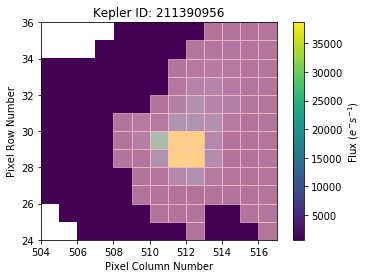

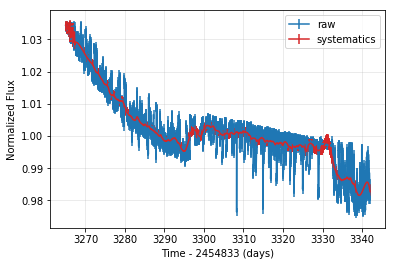

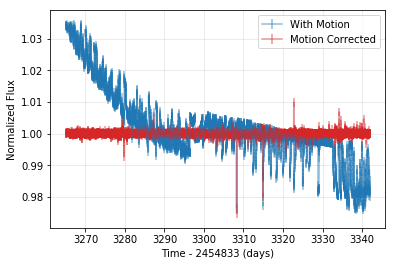

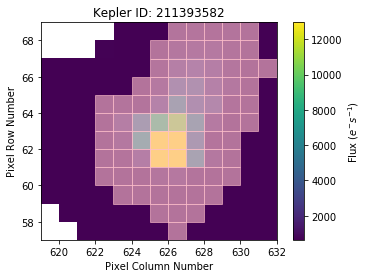

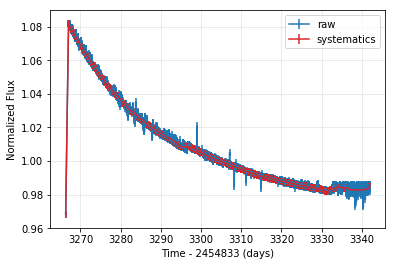

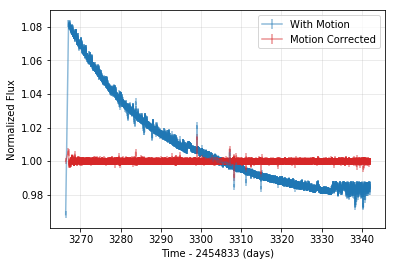

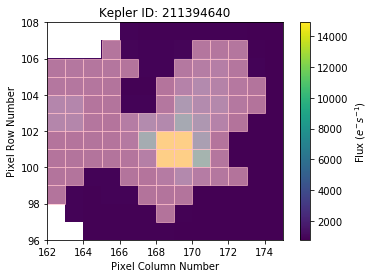

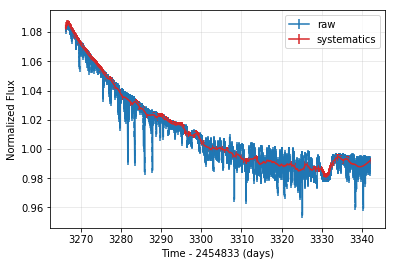

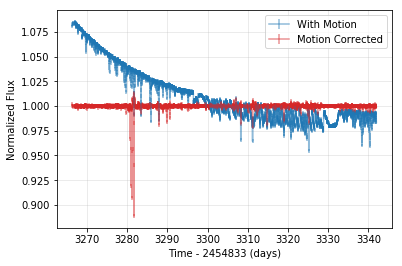

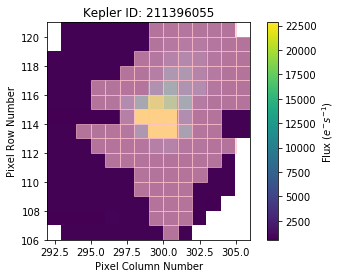

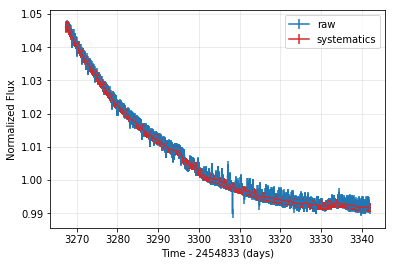

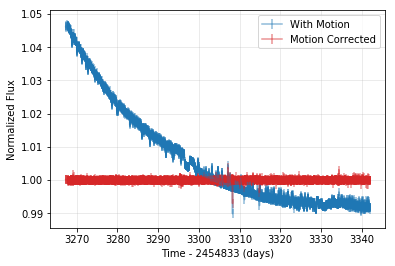

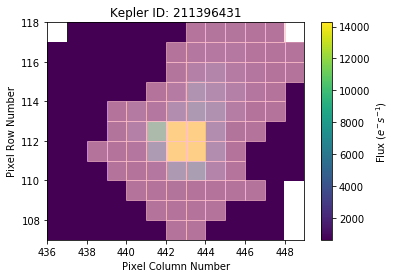

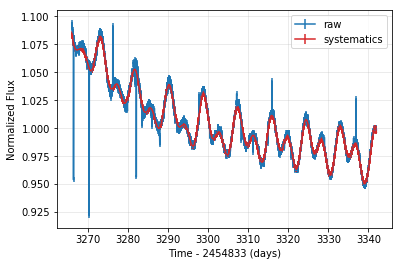

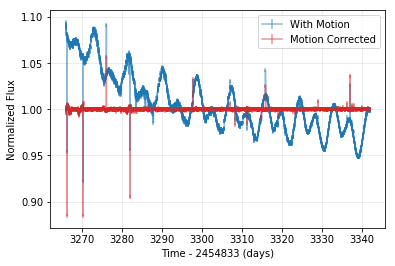

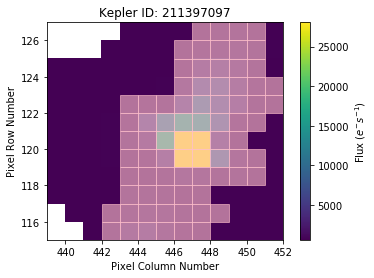

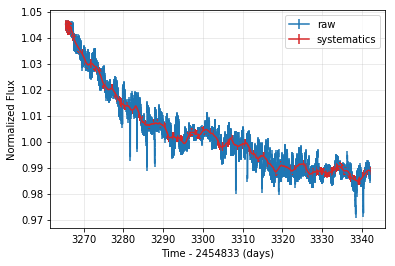

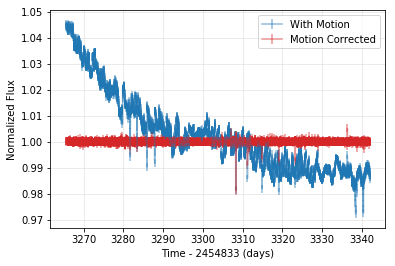

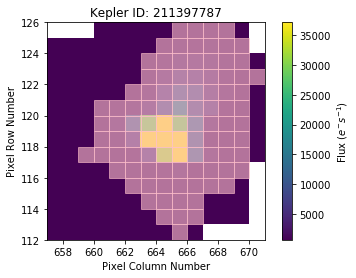

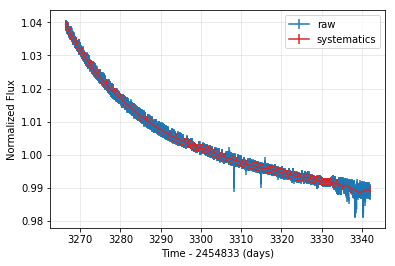

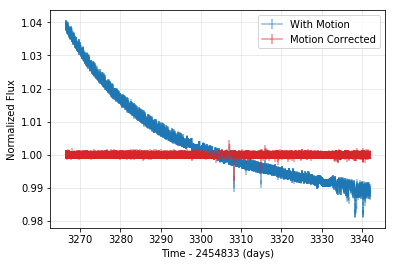

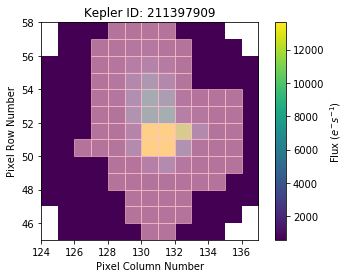

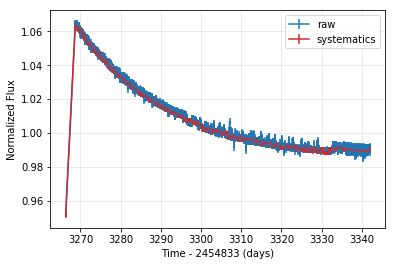

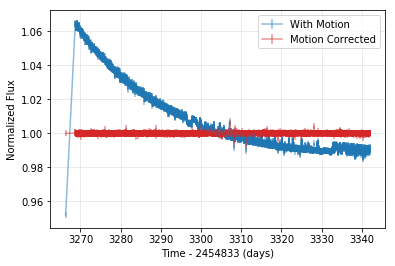

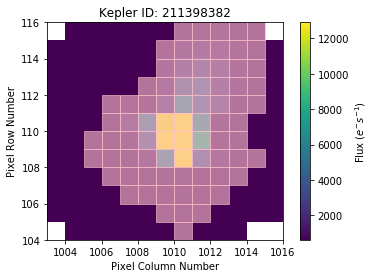

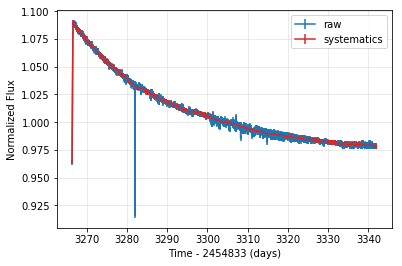

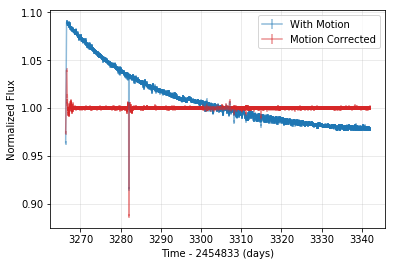

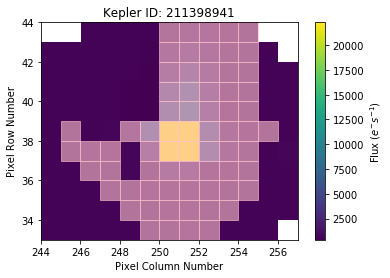

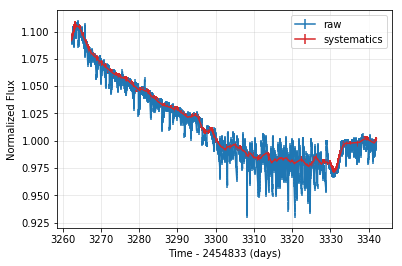

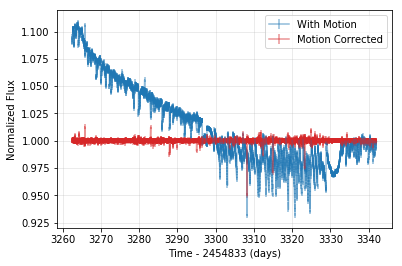

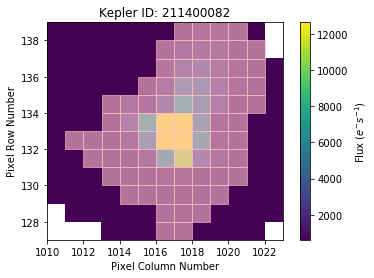

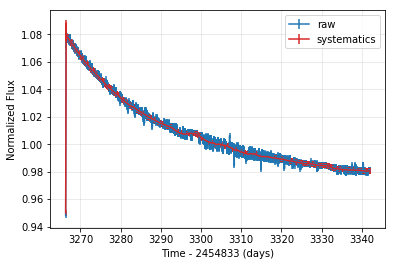

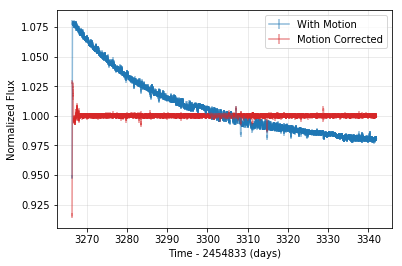

In [34]:
for i in file_list[5:]:
    try:
        #read tpf
        tpf = KeplerTargetPixelFile(i, quality_bitmask='hardest')
        #confirm aperture
        times, fluxes = tpf.time, tpf.flux
        aperture = find_aperture(times,fluxes,starname=tpf.keplerid)
        tpf.plot(aperture_mask=aperture)
        #convert to lightcurve
        lc = tpf.to_lightcurve(aperture_mask=aperture)
        #clean 
        lc = lc.remove_nans().remove_outliers(sigma=sigma)
        #correcting for low freq variability
        flat_lc, trend = lc.flatten(window_length=flat_window,
                            polyorder=polyorder,
                            break_tolerance=break_tolerance, 
                            return_trend=True)
        ax = lc.plot(color='C0', label='raw')                         
        trend.plot(ax=ax, color='C3',label='systematics');
        #correct for systematics using sff
        corr_lc = lc.correct(windows=corr_window, method='sff')
        
        #corr_lc = corr_lc.remove_outliers(sigma=10)
        #comparison
        ax2 = lc.plot(color='C0', alpha=0.5, label='With Motion')
        corr_lc.plot(ax=ax2, color='C3', alpha=0.5, label='Motion Corrected');
        
        cdpp = noise_statistic(corr_lc.time, corr_lc.flux, verbose=True)
    except:
        print(i)

In [58]:
mask = corr_lc.flux<0.5
t,f,e = corr_lc.time[~mask], corr_lc.flux[~mask], corr_lc.flux_err[~mask]

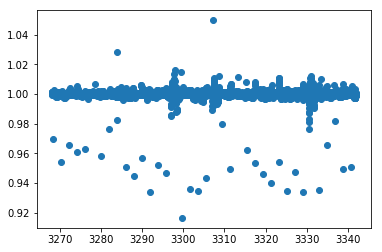

In [59]:
pl.plot(t,f,'o')

In [60]:
import gatspy
from gatspy.periodic import LombScargleFast # see also LombScargleAstroML

thin = 1
model = LombScargleFast().fit(t[::thin], f[::thin], e[::thin])
periods, power = model.periodogram_auto(nyquist_factor=100)

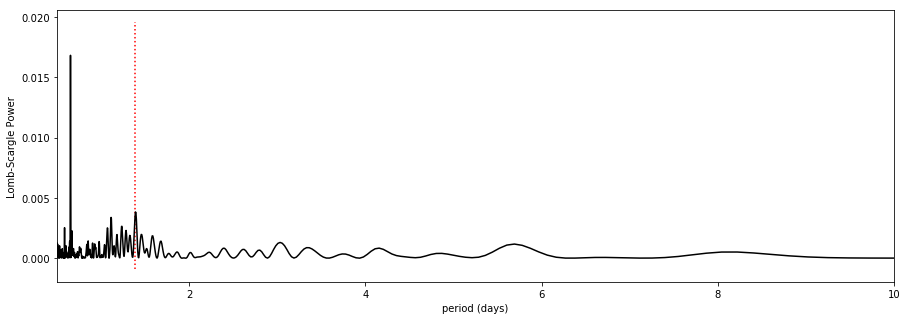

In [61]:
idx1 = periods > 1
idx2 = np.argmax(power[idx1])
peak = periods[idx1][idx2]

fig, ax = pl.subplots(1,1,figsize=(15,5))
ax.plot(periods, power, 'k-')
ax.set(xlim=(0.5, 10),
#         , ylim=(0, 0.01),
   xlabel='period (days)',
   ylabel='Lomb-Scargle Power')
ax.vlines(peak, *ax.get_ylim(), linestyles='dotted', colors='r')

In [62]:
peak

1.3909174861820568

In [63]:
#optimization
# set range and find period
model.optimizer.period_range=(2, 3)
peak = model.best_period
print("period = {0}".format(peak))

Finding optimal frequency:
 - Estimated peak width = 0.0849
 - Using 5 steps per peak; omega_step = 0.017
 - User-specified period range:  2 to 3
 - Computing periods at 63 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
period = 3.0245242265093526


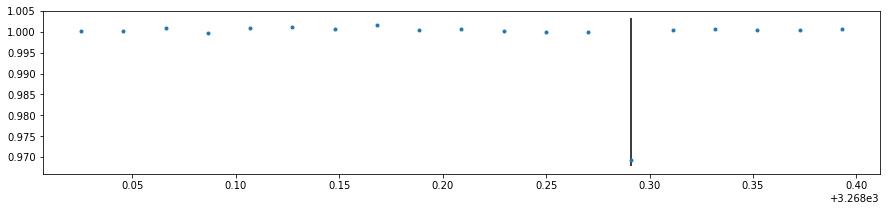

In [64]:
idx = (3268 < t) & (t < 3268.4)
tsub, fsub = t[idx], f[idx]
idx = fsub < np.median(fsub) - 0.5 * np.std(fsub)
t0 = np.median(tsub[idx])

fig, ax = pl.subplots(1,1,figsize=(15,3))
ax.plot(tsub, fsub, '.')
ax.vlines(t0, *ax.get_ylim())

In [65]:
#import simfit
#tf, ff = simfit.util.fold(t, f, peak, t0)

def get_tns(t, p, t0):

    idx = t != 0
    t = t[idx]

    while t0-p > t.min():
        t0 -= p
    if t0 < t.min():
        t0 += p

    tns = [t0+p*i for i in range(int((t.max()-t0)/p+1))]

    while tns[-1] > t.max():
        tns.pop()

    while tns[0] < t.min():
        tns = tns[1:]

    return tns


def fold(t, f, p, t0, width=0.4, clip=False, bl=False, t14=0.2):
    tns = get_tns(t, p, t0)
    tf, ff = np.empty(0), np.empty(0)
    for i,tn in enumerate(tns):
        idx = (t > tn - width/2.) & (t < tn + width/2.)
        ti = t[idx]-tn
        fi = f[idx]
        fi /= np.nanmedian(fi)
        if bl:
            idx = (ti < -t14/2.) | (ti > t14/2.)
            assert np.isfinite(ti[idx]).all() & np.isfinite(fi[idx]).all()
            assert idx.sum() > 0
            try:
                res = sm.RLM(fi[idx], sm.add_constant(ti[idx])).fit()
                if np.abs(res.params[1]) > 1e-2:
                    print('bad data probably causing poor fit')
                    print('transit {} baseline params: {}'.format(i, res.params))
                    continue
                model = res.params[0] + res.params[1] * ti
                fi = fi - model + 1
            except:
                print("error computing baseline for transit {}".format(i))
                print("num. points: {}".format(idx.sum()))
                print(ti)
        tf = np.append(tf, ti)
        ff = np.append(ff, fi / np.nanmedian(fi))
    idx = np.argsort(tf)
    tf = tf[idx]
    ff = ff[idx]
    if clip:
        fc = sigma_clip(ff, sigma_lower=10, sigma_upper=2)
        tf, ff = tf[~fc.mask], ff[~fc.mask]
    return tf, ff

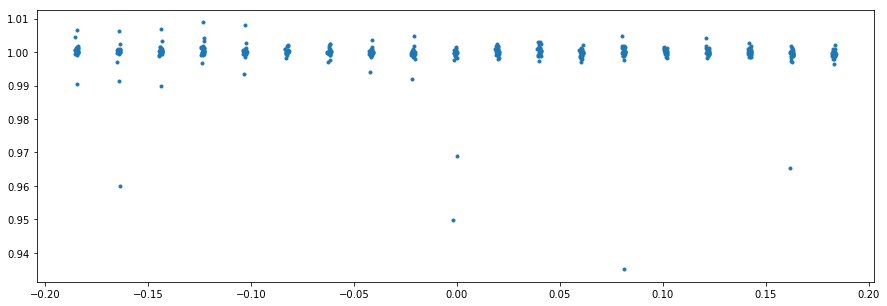

In [66]:
tf, ff = fold(t, f, peak, t0)

fig, ax = pl.subplots(1,1,figsize=(15,5))
ax.plot(tf, ff, '.')